In [1]:
# Import Dependencies
import os
import pandas as pd
import numpy as np
import requests
import json
import pprint
import matplotlib.pyplot as plt
from scipy import stats
from config import (aqs_api_key)
from config import (email_address)
from datetime import date

# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
daily_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
# state_data_url = https://aqs.epa.gov/data/api/dailyData/byState
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"
Illinois = "17"

cali_data = []
hawaii19_data = []
hawaii20_data = []
ny_data = []
dc_data = []
mass_data = []
illinois_nd_19_data = []
illinois_nd_20_data = []
illinois_sd_19_data = []
illinois_sd_20_data = []
illinois_cm_19_data = []
illinois_cm_20_data = []
illinois_pm_19_data = []
illinois_pm_20_data = []
illinois_oz_19_data = []
illinois_oz_20_data = []



In [2]:
#Illinois 2019 and 2020 ozone 44201

illinois_oz_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_oz_19_response = requests.get(daily_data_url, params = illinois_oz_19_params).json()
illinois_oz_19_data.append(illinois_oz_19_response)

illinois_oz_19_df = pd.DataFrame(illinois_oz_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_oz_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_oz_20_response = requests.get(daily_data_url, params = illinois_oz_20_params).json()
illinois_oz_20_data.append(illinois_oz_20_response)

#create df for illinois 2020
illinois_oz_20_df = pd.DataFrame(illinois_oz_20_data[0]["Data"])
illinois_oz_20_df
#merge 2020
merge_illinois_oz_df = illinois_oz_19_df.append(illinois_oz_20_df)
merge_illinois_oz_df.head()




,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03
1,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03
2,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03
3,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,1 HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03
4,17,031,0032,44201,1,41.755832,-87.54535,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,SOUTH WATER FILTRATION PLANT,3300 E. CHELTENHAM PL.,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2019-12-03


In [3]:
#drop columns in Illinois DF. ozone Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_oz_clean_df = merge_illinois_oz_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_oz_clean_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-02-28,2,8.0,0.033000,0.033,22,31.0,Illinois,Cook,Chicago
1,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-02-28,2,8.0,0.033000,0.033,22,31.0,Illinois,Cook,Chicago
2,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-02-28,2,12.0,0.033000,0.033,22,31.0,Illinois,Cook,Chicago
3,0032,41.755832,-87.54535,1 HOUR,2019-03-01,24,100.0,0.037667,0.042,17,NaN,Illinois,Cook,Chicago
4,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-03-01,24,100.0,0.038042,0.041,13,38.0,Illinois,Cook,Chicago


In [4]:
#run ozone by 8 Hour Sample (used 24 hours because it provided a longer time frame, 8 hour only shows one year, 1 hour is nothing)
sample_duration_oz = illinois_oz_clean_df["sample_duration"] == "8-HR RUN AVG BEGIN HOUR"
sample_duration_oz

illinois_oz_clean_df = illinois_oz_clean_df[sample_duration_oz]
illinois_oz_clean_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-02-28,2,8.0,0.033000,0.033,22,31.0,Illinois,Cook,Chicago
1,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-02-28,2,8.0,0.033000,0.033,22,31.0,Illinois,Cook,Chicago
2,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-02-28,2,12.0,0.033000,0.033,22,31.0,Illinois,Cook,Chicago
4,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-03-01,24,100.0,0.038042,0.041,13,38.0,Illinois,Cook,Chicago
5,0032,41.755832,-87.54535,8-HR RUN AVG BEGIN HOUR,2019-03-01,24,100.0,0.038042,0.041,13,38.0,Illinois,Cook,Chicago


In [6]:
#group Iliinois data ozone in dataframe with groupby
illinois_oz_group = pd.DataFrame(illinois_oz_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_oz_group.index
#convert index to datetime
illinois_oz_group.index = pd.to_datetime(illinois_oz_group.index)
#average data by months
monthly_oz_averages = illinois_oz_group.resample('M').mean()
# elimiate nans
# illinois_oz_df =monthly_oz_averages.fillna(0)
# illinois_oz_df
# illinois_df.index

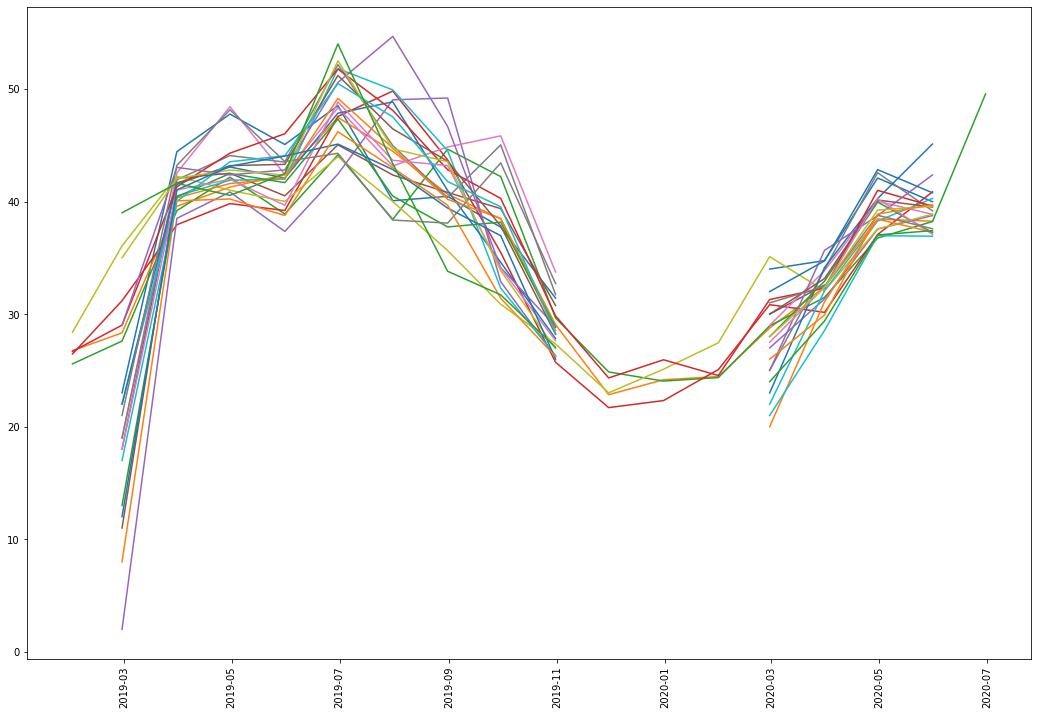

In [7]:
# #plot aqi against time for each county ozone in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_oz_averages.index
y_values = monthly_oz_averages['aqi']
plt.plot(x_values,y_values)
#needto add title, x axis labels include units of meausres, need to add legend for counties

In [8]:
#Illinois 2019 and 2020 PM2.5

illinois_pm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_pm_19_response = requests.get(daily_data_url, params = illinois_pm_19_params).json()
illinois_pm_19_data.append(illinois_pm_19_response)

illinois_pm_19_df = pd.DataFrame(illinois_pm_19_data[0]["Data"])

# create DF for Illinois 2020 and pull PM 2.5 from APi
illinois_pm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "88502", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_pm_20_response = requests.get(daily_data_url, params = illinois_pm_20_params).json()
illinois_pm_20_data.append(illinois_pm_20_response)

#create df for illinois 2020
illinois_pm_20_df = pd.DataFrame(illinois_pm_20_data[0]["Data"])
illinois_pm_20_df
#merge 2020
merge_illinois_pm_df = illinois_pm_19_df.append(illinois_pm_20_df)
merge_illinois_pm_df.head()






,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
1,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
2,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
3,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,24-HR BLK AVG,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
4,17,031,0076,88502,3,41.7514,-87.713488,WGS84,Acceptable PM2.5 AQI & Speciation Mass,1 HOUR,...,731,Met-One BAM-1020 W/PM2.5 SCC - Beta Attenuation,COM ED MAINTENANCE BLDG,7801 LAWNDALE,Illinois,Cook,Chicago,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15


In [9]:
#drop columns in Illinois DF. PM 2.5 Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_pm_clean_df = merge_illinois_pm_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_pm_clean_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0076,41.7514,-87.713488,1 HOUR,2019-01-01,24,100.0,7.416667,13.1,23,NaN,Illinois,Cook,Chicago
1,0076,41.7514,-87.713488,24-HR BLK AVG,2019-01-01,1,100.0,7.400000,7.4,23,31.0,Illinois,Cook,Chicago
2,0076,41.7514,-87.713488,1 HOUR,2019-01-02,24,100.0,11.950000,21.7,8,NaN,Illinois,Cook,Chicago
3,0076,41.7514,-87.713488,24-HR BLK AVG,2019-01-02,1,100.0,11.900000,11.9,23,50.0,Illinois,Cook,Chicago
4,0076,41.7514,-87.713488,1 HOUR,2019-01-03,24,100.0,8.591667,15.9,10,NaN,Illinois,Cook,Chicago


In [10]:
#run PM 2.5 by 24 hour sample (1 hour sample is null)
sample_duration_pm = illinois_pm_clean_df["sample_duration"] == "24-HR BLK AVG"
sample_duration_pm

illinois_pm_clean_df = illinois_pm_clean_df[sample_duration_pm]
illinois_pm_clean_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
1,0076,41.7514,-87.713488,24-HR BLK AVG,2019-01-01,1,100.0,7.4,7.4,23,31.0,Illinois,Cook,Chicago
3,0076,41.7514,-87.713488,24-HR BLK AVG,2019-01-02,1,100.0,11.9,11.9,23,50.0,Illinois,Cook,Chicago
5,0076,41.7514,-87.713488,24-HR BLK AVG,2019-01-03,1,100.0,8.5,8.5,23,35.0,Illinois,Cook,Chicago
7,0076,41.7514,-87.713488,24-HR BLK AVG,2019-01-04,1,100.0,10.5,10.5,23,44.0,Illinois,Cook,Chicago
9,0076,41.7514,-87.713488,24-HR BLK AVG,2019-01-05,1,100.0,14.3,14.3,23,56.0,Illinois,Cook,Chicago


In [13]:
#group Iliinois data PM 2.5 in dataframe with groupby
illinois_pm_group = pd.DataFrame(illinois_pm_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_pm_group.index
#convert index to datetime
illinois_pm_group.index = pd.to_datetime(illinois_pm_group.index)
#average data by months
monthly_pm_averages = illinois_pm_group.resample('M').mean()
# elimiate nans
# illinois_pm_df =monthly_pm_averages.fillna(0)
# illinois_pm_df
# illinois_df.index

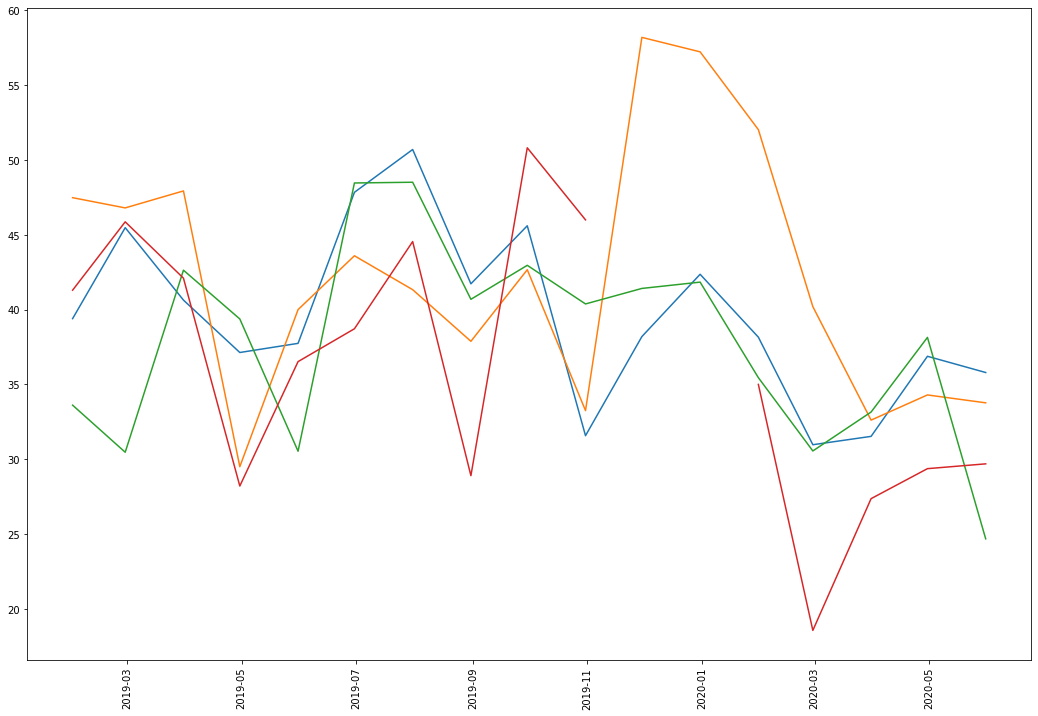

In [14]:
# #plot aqi against time for each county PM 2.5 in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_pm_averages.index
y_values = monthly_pm_averages['aqi']
plt.plot(x_values,y_values)
#needto add title, x axis labels include units of meausres, need to add legend for counties

In [15]:
#Illinois 2019 and 2020 nitrogen dixodie

illinois_nd_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42602", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_nd_19_response = requests.get(daily_data_url, params = illinois_nd_19_params).json()
illinois_nd_19_data.append(illinois_nd_19_response)

illinois_nd_19_df = pd.DataFrame(illinois_nd_19_data[0]["Data"])

# create DF for Illinois 2020 and pull sulfur Data from APi
illinois_nd_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42602", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_nd_20_response = requests.get(daily_data_url, params = illinois_nd_20_params).json()
illinois_nd_20_data.append(illinois_nd_20_response)

#create df for illinois 2020
illinois_nd_20_df = pd.DataFrame(illinois_nd_20_data[0]["Data"])
illinois_nd_20_df
#merge 2020
merge_illinois_nd_df = illinois_nd_19_df.append(illinois_nd_20_df)
merge_illinois_nd_df.head()








,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
1,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
2,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
3,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15
4,17,031,4002,42602,1,41.855243,-87.75247,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,074,INSTRUMENTAL - CHEMILUMINESCENCE,COOK COUNTY TRAILER,1820 S. 51ST AVE.,Illinois,Cook,Cicero,16980,"Chicago-Naperville-Elgin, IL-IN-WI",2020-01-15


In [16]:
#drop columns in Illinois DF.nitrogen dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_nd_clean_df = merge_illinois_nd_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_nd_clean_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,4002,41.855243,-87.75247,1 HOUR,2019-01-01,24,100.0,11.337500,19.3,22,18,Illinois,Cook,Cicero
1,4002,41.855243,-87.75247,1 HOUR,2019-01-01,24,100.0,11.337500,19.3,22,18,Illinois,Cook,Cicero
2,4002,41.855243,-87.75247,1 HOUR,2019-01-02,24,100.0,15.904167,31.8,1,29,Illinois,Cook,Cicero
3,4002,41.855243,-87.75247,1 HOUR,2019-01-02,24,100.0,15.904167,31.8,1,29,Illinois,Cook,Cicero
4,4002,41.855243,-87.75247,1 HOUR,2019-01-03,24,100.0,15.825000,23.7,16,22,Illinois,Cook,Cicero


In [17]:
#run nitrogen dioxideby 1 hour sample - only option
sample_duration_nd = illinois_nd_clean_df["sample_duration"] == "1 HOUR"
sample_duration_nd

illinois_nd_clean_df = illinois_nd_clean_df[sample_duration_nd]
illinois_nd_clean_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,4002,41.855243,-87.75247,1 HOUR,2019-01-01,24,100.0,11.337500,19.3,22,18,Illinois,Cook,Cicero
1,4002,41.855243,-87.75247,1 HOUR,2019-01-01,24,100.0,11.337500,19.3,22,18,Illinois,Cook,Cicero
2,4002,41.855243,-87.75247,1 HOUR,2019-01-02,24,100.0,15.904167,31.8,1,29,Illinois,Cook,Cicero
3,4002,41.855243,-87.75247,1 HOUR,2019-01-02,24,100.0,15.904167,31.8,1,29,Illinois,Cook,Cicero
4,4002,41.855243,-87.75247,1 HOUR,2019-01-03,24,100.0,15.825000,23.7,16,22,Illinois,Cook,Cicero


In [18]:
#group Iliinois data nitrogen dioxide in dataframe with groupby
illinois_nd_group = pd.DataFrame(illinois_nd_clean_df.groupby(["date_local","county"]).mean().unstack())
illinois_nd_group.index
#convert index to datetime
illinois_nd_group.index = pd.to_datetime(illinois_nd_group.index)
#average data by months
monthly_nd_averages = illinois_nd_group.resample('M').mean()
# elimiate nans
# illinois_nd_df =monthly_nd_averages.fillna(0)
# illinois_nd_df
# illinois_df.index

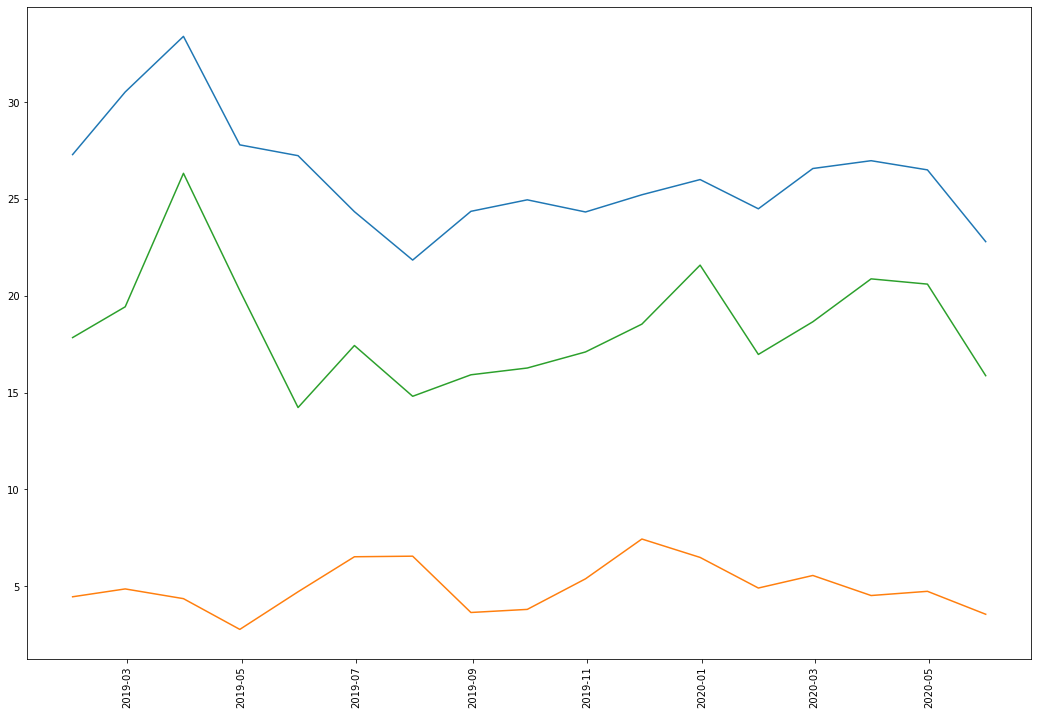

In [19]:
# #plot aqi against time for each county nitrogen dioxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_nd_averages.index
y_values = monthly_nd_averages['aqi']
plt.plot(x_values,y_values)
#needto add title, x axis labels include units of meausres, need to add legend for counties


In [20]:
# # Illinois 2019 and 2020 data for sulfur DIOXIDE

illinois_sd_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # # Call to url for Illinois 2019
illinois_sd_19_response = requests.get(daily_data_url, params = illinois_sd_19_params).json()
illinois_sd_19_data.append(illinois_sd_19_response)

illinois_sd_19_df = pd.DataFrame(illinois_sd_19_data[0]["Data"])

# # create DF for Illinois 2020 and pull sulfur Data from APi
illinois_sd_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42401", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

# #call url for Illinois 2020
illinois_sd_20_response = requests.get(daily_data_url, params = illinois_sd_20_params).json()
illinois_sd_20_data.append(illinois_sd_20_response)

# #create df for illinois 2020
illinois_sd_20_df = pd.DataFrame(illinois_sd_20_data[0]["Data"])
illinois_sd_20_df
#merge 2020
merge_illinois_sd_df = illinois_sd_19_df.append(illinois_sd_20_df)
merge_illinois_sd_df.head()



,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,1 HOUR,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15
1,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,1 HOUR,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15
2,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,24-HR BLK AVG,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15
3,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,3-HR BLK AVG,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15
4,17,179,0004,42401,2,40.55646,-89.654028,WGS84,Sulfur dioxide,1 HOUR,...,100,INSTRUMENTAL - ULTRAVIOLET FLUORESCENCE,FIRESTATION,272 DERBY,Illinois,Tazewell,Pekin,37900,"Peoria, IL",2020-01-15


In [21]:
# #drop columns in Illinois DF. Sulfur Dioxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_sd_df = merge_illinois_sd_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_clean_sd_df

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0004,40.556460,-89.654028,1 HOUR,2019-01-01,24,100.0,1.179167,2.0,9,3.0,Illinois,Tazewell,Pekin
1,0004,40.556460,-89.654028,1 HOUR,2019-01-01,24,100.0,1.179167,2.0,9,3.0,Illinois,Tazewell,Pekin
2,0004,40.556460,-89.654028,24-HR BLK AVG,2019-01-01,1,100.0,1.200000,1.2,23,NaN,Illinois,Tazewell,Pekin
3,0004,40.556460,-89.654028,3-HR BLK AVG,2019-01-01,8,100.0,1.137500,1.5,11,NaN,Illinois,Tazewell,Pekin
4,0004,40.556460,-89.654028,1 HOUR,2019-01-02,24,100.0,0.695833,1.0,2,1.0,Illinois,Tazewell,Pekin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8047,0117,39.880404,-88.894488,1 HOUR,2020-03-31,20,83.0,-0.140000,0.1,11,0.0,Illinois,Macon,Decatur
8048,0117,39.880404,-88.894488,24-HR BLK AVG,2020-03-31,1,100.0,-0.100000,-0.1,23,NaN,Illinois,Macon,Decatur
8049,0117,39.880404,-88.894488,3-HR BLK AVG,2020-03-31,6,75.0,-0.116667,0.0,11,NaN,Illinois,Macon,Decatur
8050,0117,39.880404,-88.894488,1 HOUR,2020-04-01,1,4.0,-0.200000,-0.2,0,0.0,Illinois,Macon,Decatur


In [22]:
# isolate data to 1 hour hour duration only sulfur dioxide; 24 and 3 hour samples are null

sample_duration_sd = illinois_clean_sd_df["sample_duration"] == "1 HOUR"
sample_duration_sd

illinois_clean_sd_df = illinois_clean_sd_df[sample_duration_sd]
illinois_clean_sd_df.head()



,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0004,40.55646,-89.654028,1 HOUR,2019-01-01,24,100.0,1.179167,2.0,9,3.0,Illinois,Tazewell,Pekin
1,0004,40.55646,-89.654028,1 HOUR,2019-01-01,24,100.0,1.179167,2.0,9,3.0,Illinois,Tazewell,Pekin
4,0004,40.55646,-89.654028,1 HOUR,2019-01-02,24,100.0,0.695833,1.0,2,1.0,Illinois,Tazewell,Pekin
5,0004,40.55646,-89.654028,1 HOUR,2019-01-02,24,100.0,0.695833,1.0,2,1.0,Illinois,Tazewell,Pekin
8,0004,40.55646,-89.654028,1 HOUR,2019-01-03,24,100.0,0.862500,1.3,4,1.0,Illinois,Tazewell,Pekin


In [23]:
#group Iliinois data sulfur dioxide in dataframe with groupby
illinois_group_sd = pd.DataFrame(illinois_clean_sd_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_sd.index
#convert index to datetime
illinois_group_sd.index = pd.to_datetime(illinois_group_sd.index)
#average data by months
monthly_averages_sd = illinois_group_sd.resample('M').mean()
# elimiate nans
# illinois_df_sd =monthly_averages_sd.fillna(0)
# illinois_df_sd
# illinois_df_sd.index

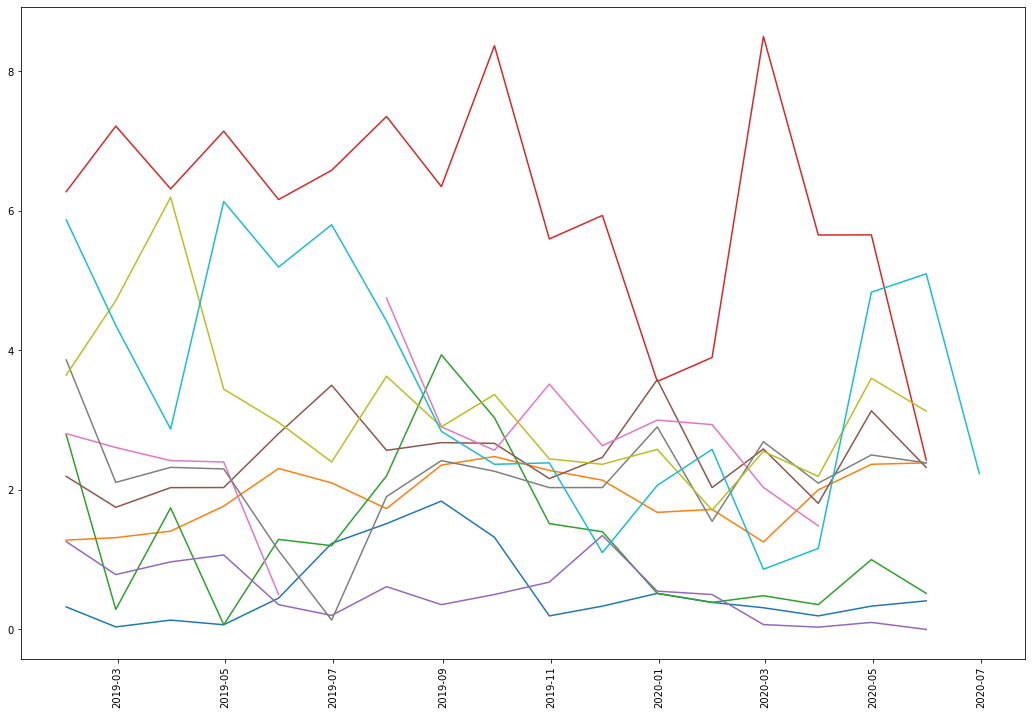

In [25]:
# #plot aqi against time for each county sulfur dioxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_averages_sd.index
y_values = monthly_averages_sd['aqi']
plt.plot(x_values,y_values)


In [26]:
# Create a DataFrame for Illinois 2019 and pull carbon monoxide data from API
illinois_cm_19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20190101", "edate" : "20191231", "state" : Illinois}
# # Call to url for Illinois 2019
illinois_cm_19_response = requests.get(daily_data_url, params = illinois_cm_19_params).json()
illinois_cm_19_data.append(illinois_cm_19_response)

illinois_cm_19_df = pd.DataFrame(illinois_cm_19_data[0]["Data"])

#create DF for Illinois 2020 and pull Carbon Monoxide Data from APi
illinois_cm_20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
          "bdate" : "20200101", "edate" : "20200731", "state" : Illinois}

#call url for Illinois 2020
illinois_cm_20_response = requests.get(daily_data_url, params = illinois_cm_20_params).json()
illinois_cm_20_data.append(illinois_cm_20_response)

#create df for illinois 2020
illinois_cm_20_df = pd.DataFrame(illinois_cm_20_data[0]["Data"])
illinois_cm_20_df
#merge 2020
merge_illinois_cm_df = illinois_cm_19_df.append(illinois_cm_20_df)
merge_illinois_cm_df.head()

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04
1,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04
2,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04
3,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,8-HR RUN AVG END HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04
4,17,163,0010,42101,1,38.612034,-90.160477,WGS84,Carbon monoxide,1 HOUR,...,054,INSTRUMENTAL - NONDISPERSIVE INFRARED,IEPA-RAPS TRAILER,13TH & TUDOR,Illinois,Saint Clair,East Saint Louis,41180,"St. Louis, MO-IL",2019-09-04


In [27]:
#drop columns in Illinois DF. Carbon Monoxide Show: site_number, latitude, longitude, sample_duration, date_local, observation_count, observation_percent, arithmetic_mean, first_max_value, first_max_hour, aqi, state, county, city)
illinois_clean_cm_df = merge_illinois_cm_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa","date_of_last_change"], axis=1) 
illinois_clean_cm_df.head()

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
0,0010,38.612034,-90.160477,1 HOUR,2019-01-01,24,100.0,0.183333,0.2,4,NaN,Illinois,Saint Clair,East Saint Louis
1,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-01,19,79.0,0.189474,0.2,7,2.0,Illinois,Saint Clair,East Saint Louis
2,0010,38.612034,-90.160477,1 HOUR,2019-01-02,24,100.0,0.195833,0.3,7,NaN,Illinois,Saint Clair,East Saint Louis
3,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-02,24,100.0,0.200000,0.2,0,2.0,Illinois,Saint Clair,East Saint Louis
4,0010,38.612034,-90.160477,1 HOUR,2019-01-03,24,100.0,0.425000,1.5,21,NaN,Illinois,Saint Clair,East Saint Louis


In [28]:
# isolate data to 8 hour duration only carbond monoxide, 1 hour is null

sample_duration_cm = illinois_clean_cm_df["sample_duration"] == "8-HR RUN AVG END HOUR"
sample_duration_cm

illinois_clean_cm_df = illinois_clean_cm_df[sample_duration_cm]
illinois_clean_cm_df.head()



# illinois_clean_df["aqi"].fillna(0)
# illinois_clean_df

,site_number,latitude,longitude,sample_duration,date_local,observation_count,observation_percent,arithmetic_mean,first_max_value,first_max_hour,aqi,state,county,city
1,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-01,19,79.0,0.189474,0.2,7,2.0,Illinois,Saint Clair,East Saint Louis
3,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-02,24,100.0,0.200000,0.2,0,2.0,Illinois,Saint Clair,East Saint Louis
5,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-03,24,100.0,0.304167,0.8,23,9.0,Illinois,Saint Clair,East Saint Louis
7,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-04,24,100.0,0.558333,0.9,1,10.0,Illinois,Saint Clair,East Saint Louis
9,0010,38.612034,-90.160477,8-HR RUN AVG END HOUR,2019-01-05,24,100.0,0.420833,0.8,22,9.0,Illinois,Saint Clair,East Saint Louis


In [32]:
#group Iliinois carbon monoxide data in dataframe with groupby
illinois_group_cm= pd.DataFrame(illinois_clean_cm_df.groupby(["date_local","county"]).mean().unstack())
illinois_group_cm.index
#convert index to datetime
illinois_group_cm.index = pd.to_datetime(illinois_group_cm.index)
#average data by months
monthly_averages_cm = illinois_group_cm.resample('M').mean()
# elimiate nans
# illinois_cm_df =monthly_averages_cm.fillna(0)
# illinois_cm_df
# illinois_cm_df.index


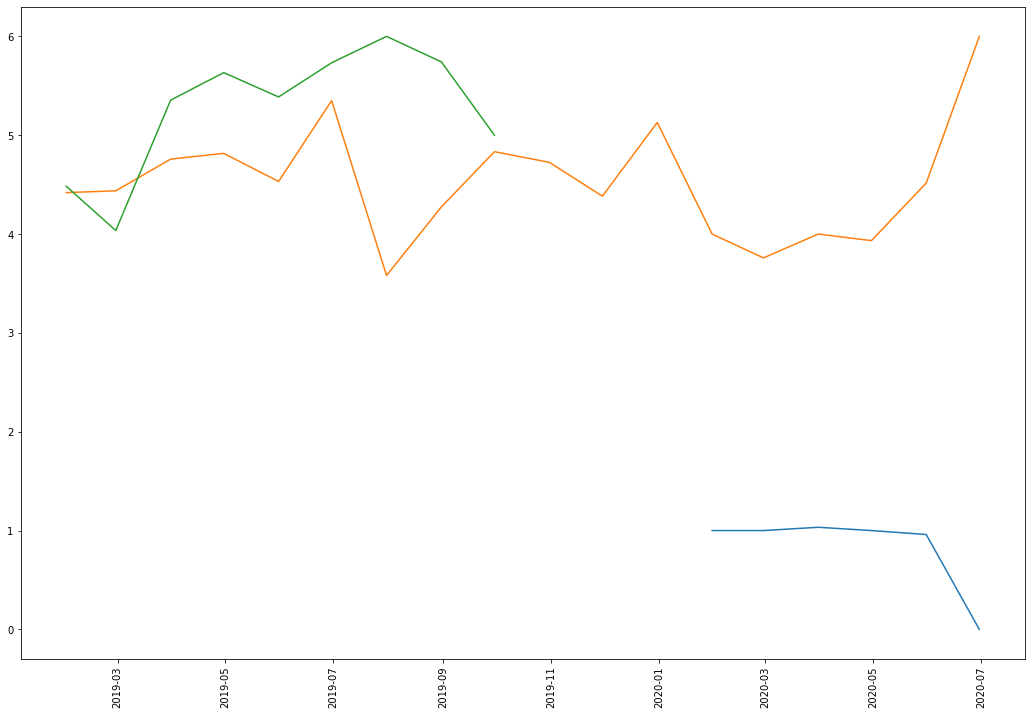

In [33]:
#plot aqi against time for each county cardbon monoxide in group by df
fig, ax = plt.subplots(figsize=(18,12))
plt.xticks(rotation = 90)
x_values = monthly_averages_cm.index
y_values = monthly_averages_cm['aqi']
plt.plot(x_values,y_values)


In [ ]:
#bargraph for each parameter for March 2019 and March 2020 



In [ ]:
#Hawaii 2019 and 2020 call for data 
# Create a DataFrame for Hawaii 2019 and pull carbon monoxide data from API
# hawaii19_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
#           "bdate" : "20190101", "edate" : "20191231", "state" : Hawaii}
# # # Call to url for 2019
# hawaii19_response = requests.get(daily_data_url, params = hawaii19_params).json()
# hawaii19_data.append(hawaii19_response)

# hawaii19_df = pd.DataFrame(hawaii19_data[0]["Data"])
# # # # Call to url

# hawaii20_params = {"email" : email_address, "key" : aqs_api_key, "param" : "42101", 
#           "bdate" : "20200101", "edate" : "20200731", "state" : Hawaii}
# hawaii20_response = requests.get(daily_data_url, params = hawaii20_params).json()
# hawaii20_data.append(hawaii20_response)

# hawaii20_df = pd.DataFrame(hawaii20_data[0]["Data"])
# hawaii20_df
# merge_hawaii_df = hawaii19_df.append(hawaii20_df)
# merge_hawaii_df

In [ ]:
#Hawaii
# clean up and create new data frame 
#columns needed state_code, site_number, paramter_code, parameter, latitude, longitude, sample_duration (8 Hour Avg  Begin Hour vs 1 Hour),date_local, observation_count, arithmetic_mean, first_max_value, first_max_hour, aqi)

# hawaii_clean_df = merge_hawaii_df.drop(["parameter_code", "datum", "cbsa_code","poc", "method_code","local_site_name","event_type","validity_indicator","method_code","state_code","county_code","parameter","pollutant_standard","units_of_measure","method", "site_address","cbsa"], axis=1) 
# hawaii_clean_df

In [ ]:
# Hawaii
# sample_duration = hawaii_clean_df["sample_duration"] == "8-HR RUN AVG END HOUR"
# sample_duration

# hawaii_clean_df = hawaii_clean_df[sample_duration]
# hawaii_clean_df



# hawaii_clean_df["aqi"].fillna(0)
# hawaii_clean_df

In [ ]:
# hawaii_group = pd.DataFrame(hawaii_clean_df.groupby(["date_local", "site_number"]).mean().unstack())
# hawaii_group.index
# hawaii_group.index = pd.to_datetime(hawaii_group.index)
# monthly_averages = hawaii_group.resample('M').mean()
# monthly_averages
# hawaii_group
# hawaii_group.index


In [ ]:
# hawaii_clean_df =hawaii_clean_df.rename(columns={ "state_code":"State Code", "site_number":"Site Number", "latitude":"Latitude","longitude":"Longitude", "parameter":"Parameter", "sample_duration": "Sample Duration", "date_local":"Date Local", "observation_count": "Observation Count", "arithmetic_mean":"Arithmetic Mean", "first_max_value":"First Maximum Value", "first_max_hour":"First Maximum Hour", "aqi":"AQI"})
# hawaii_clean_df.head()

In [ ]:
#only show 8 hour samples then sort 8 hour samples by arthimetic mean greatest to smallest 

# hawaii_sort_df = hawaii_clean_df.loc[hawaii_clean_df["Sample Duration"] == "8-HR RUN AVG END HOUR", :]
# hawaii_sort_df

# hawaii["Date Local"] = pd.to_datetime(df["Date Local"])

# hawaii_am_df = hawaii_sort_df.sort_values("AQI", ascending = False)
# hawaii_am_df


In [ ]:
#create line graph for the days over time againist the arithmetic mean for 

# hawaii_am_df 

# fig, ax = plt.subplots(figsize = (18,12))
# sns.lineplot(x ="date_local", y = "aqi", data = df, ax= ax)

# sns.lineplot
# fig, ax = plt.subplots(figsize=(18,12))
# plt.xticks(rotation = 90)
# x_values = hawaii_group.index
# y_values = hawaii_group['aqi']
# plt.plot(x_values,y_values)


# # Plot the world average as a line chart
# world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# # Plot the unemployment values for a single country
# country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
#                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# # Create a handle for each plot
# fahrenheit, = plt.plot(x_axis, points_F, marker="+",color="blue", linewidth=1, label="Fahreneit")
# celcius, = plt.plot(x_axis, points_C, marker="s", color="Red", linewidth=1, label="Celcius")

In [ ]:

# import os
# import pandas as pd
# import requests
# import json
# import pprint
# from config import (AQS_API_Key)
# from EAconfig import (email_address)



# # https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
# pp = pprint.PrettyPrinter(indent = 4)
# states_url = "https://aqs.epa.gov/data/api/list/states"
# parameters_url = "https://aqs.epa.gov/data/api/list/classes"
# sample_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
# p1 = {"email" : email_address, "key" : AQS_API_Key}


In [ ]:
# #states for data gathering
# California = "06"
# Hawai = "15"
# District_of_Columbia = "11"
# New_York = "36"
# Massachusetts = "25"

# open_data = []
# cali_data = []
# hawaii_data = []
# ny_data = []
# dc_data = []
# mass_data = []



In [ ]:
# for state in state_dir: 
#     params = {"email" : email_address, "key" : AQS_API_Key, "param" : "44201", 
#           "bdate" : "20200101", "edate" : "20200801", "state" : "06"}
#     response = requests.get(sample_data_url, params = params)
#     open_data.append (response)

# df = 
    

In [ ]:
# cali_parms = {"email" : email_address, "key" : AQS_API_Key, "param" : "44201", "bdate" : "20200101", "edate" : "20200801", "state" : "06"}
# cali_response = requests.get(sample_data_url,cali_parms).json()
# cali_data.append(cali_response)

# cali_df = pd.DataFrame(cali_data[0]["Data"])
# cali_df.head()

In [ ]:
# state_list = response.json()
# pp.pprint(state_list)

In [ ]:
# df = pd.DataFrame(state_list["Data"])


# # with open(sta

# # df = pd.read_json(state_list)
# df.to_csv('../BootcampProject1/data.csv', index = None)

# # df = pd.read_csv("data.csv")          
# # df.head()
# # name.head()